# Steady interface flow towards the coast
Mark Bakker, TU Delft, The Netherlands

In [1]:
# these are needed so that the notebook can also be run on Python 2
from __future__ import division, print_function
from pylab import *
%matplotlib notebook
from semi_interface import *

### Interface flow towards the coast
Flow is confined below the land and semi-confined below the sea. The leaky sea bottom extends a distance $L$ below the sea. The freshwater is moving and the saltwater is at rest.
![](semi_coast_layout.png)
Input variables:
* `k`: hydraulic conductivity [m/d]
* `H`: aquifer thickness [m]
* `c`: resistance of leaky layer [d]
* `grad`: absolute value of head gradient towards coast upstream of interface toe
* `rhof`: density of fresh water [kg/m3]
* `rhos`: density of salt water [kg/m3]
* `Ls`: length of leaky sea bottom below sea (may also be `inf`) [m]
* `ztop`: elevation of top of aquifer with respect to datum [m]
* `sealevel`: elevation of sealevel with respect to datum [m]

### Case I of Bakker (2006)

toe of interface at: -211.68452838
tip of interface at: 153.261886479


<IPython.core.display.Javascript object>


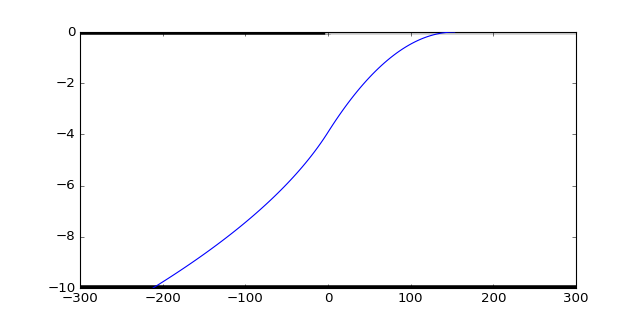

In [2]:
sc1 = SemiCoast(k=10, H=10, c=100, grad=0.0005, 
                rhof=1000, rhos=1025, Ls=inf, 
                ztop=0, sealevel=0)
print('toe of interface at:', sc1.toe())
print('tip of interface at:', sc1.tip())
sc1.plot(xmin=-300, xmax=300);

### Case II of Bakker (2006)

toe of interface at: 53.6836486682
tip of interface at: 298.632622947


<IPython.core.display.Javascript object>


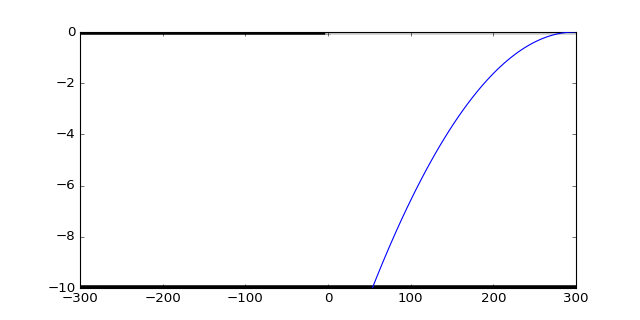

In [3]:
sc2 = SemiCoast(k=10, H=10, c=100, grad=0.00375, 
                rhof=1000, rhos=1025, Ls=inf, 
                ztop=0, sealevel=0)
print('toe of interface at:', sc2.toe())
print('tip of interface at:', sc2.tip())
sc2.plot(xmin=-300, xmax=300);

### Case III of Bakker (2006)

toe of interface at: [-212.41139369]
tip of interface at: 80.0


<IPython.core.display.Javascript object>


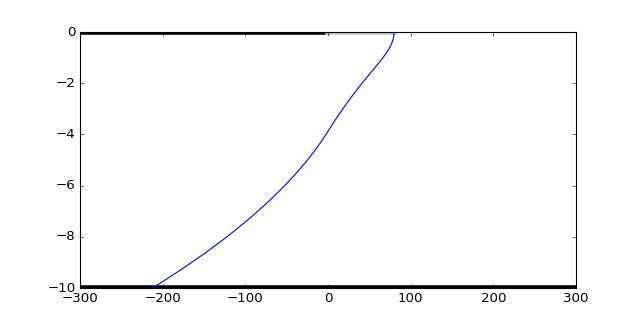

In [4]:
sc3 = SemiCoast(k=10, H=10, c=100, grad=0.0005, 
                rhof=1000, rhos=1025, Ls=80, 
                ztop=0, sealevel=0)
print('toe of interface at:', sc3.toe())
print('tip of interface at:', sc3.tip())
sc3.plot(xmin=-300, xmax=300);

### Case IV of Bakker (2006)

toe of interface at: 50.3243452459
tip of interface at: 150.0


<IPython.core.display.Javascript object>


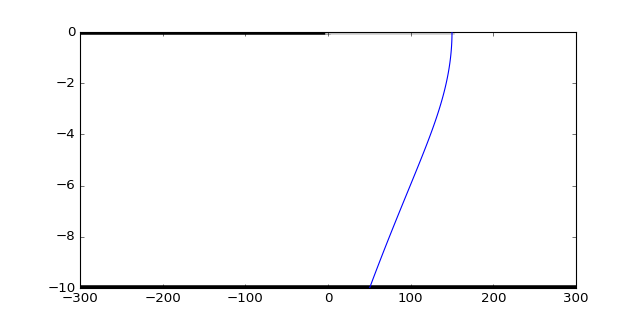

In [5]:
sc4 = SemiCoast(k=10, H=10, c=100, grad=0.00375, 
                rhof=1000, rhos=1025, Ls=150, 
                ztop=0, sealevel=0)
print('toe of interface at:', sc4.toe())
print('tip of interface at:', sc4.tip())
sc4.plot(xmin=-300, xmax=300);

### Specification of upstream head (onshore, so $x<0$)
Rather than specifying the gradient upstream of the toe, the head `h` is specified at some point `x` in the aquifer below the land (so `x` is negative).

toe of interface at: [-103.86297425]
tip of interface at: [ 181.97278682]
location of h=1 (should be -1000) [-1000.]
computed gradient: [ 0.00083693]


<IPython.core.display.Javascript object>


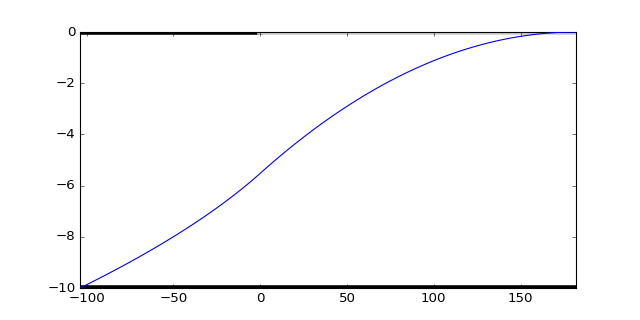

In [6]:
schead = SemiCoastHead(k=10, H=10, c=100, x=-1000, h=1, 
                       rhof=1000, rhos=1025, Ls=1000, 
                       ztop=0, sealevel=0)
print('toe of interface at:', schead.toe())
print('tip of interface at:', schead.tip())
print('location of h=1 (should be -1000)', schead.onshorex(h=1))
print('computed gradient:', schead.grad)
schead.plot();

### Figure for three different sealevels

<IPython.core.display.Javascript object>


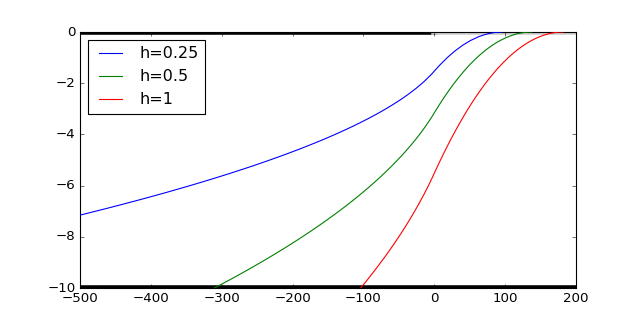

In [7]:
schead = SemiCoastHead(k=10, H=10, c=100, x=-1000, h=0.25, 
                       rhof=1000, rhos=1025, Ls=1000, 
                       ztop=0, sealevel=0, label='h=0.25')
schead.plot(xmin=-500, xmax=200)
schead = SemiCoastHead(k=10, H=10, c=100, x=-1000, h=0.5, 
                       rhof=1000, rhos=1025, Ls=1000, 
                       ztop=0, sealevel=0, label='h=0.5')
schead.plot(newfig=False);
schead = SemiCoastHead(k=10, H=10, c=100, x=-1000, h=1, 
                       rhof=1000, rhos=1025, Ls=1000, 
                       ztop=0, sealevel=0, label='h=1')
schead.plot(newfig=False);
legend(loc='best');